In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
social = pd.read_csv('Social_Network_Ads.csv')
social

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
social=social.iloc[:,2:]

In [8]:
social.sample(5)

,Age,EstimatedSalary,Purchased
215,60,108000,1
173,34,43000,0
167,35,71000,0
27,47,30000,1
129,26,84000,0


In [10]:
X = social.drop('Purchased', axis=1)
y = social['Purchased']

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

# Standard Scalar

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler =StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [24]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [26]:
scaler.mean_

array([3.7871875e+01, 7.0281250e+04])

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled =pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [30]:
X_train.describe()

,Age,EstimatedSalary
count,320.000000,320.00000
mean,37.871875,70281.25000
std,10.207525,34430.55286
min,18.000000,15000.00000
25%,30.000000,43000.00000
50%,37.000000,71000.00000
75%,45.000000,88000.00000
max,60.000000,150000.00000


In [32]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.9,70281.2
std,10.2,34430.6
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [34]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


# Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

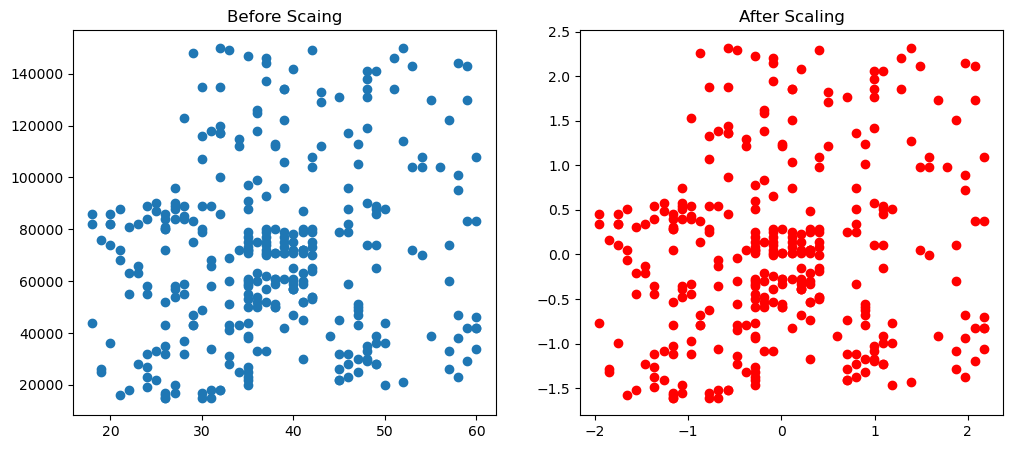

In [43]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaing')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

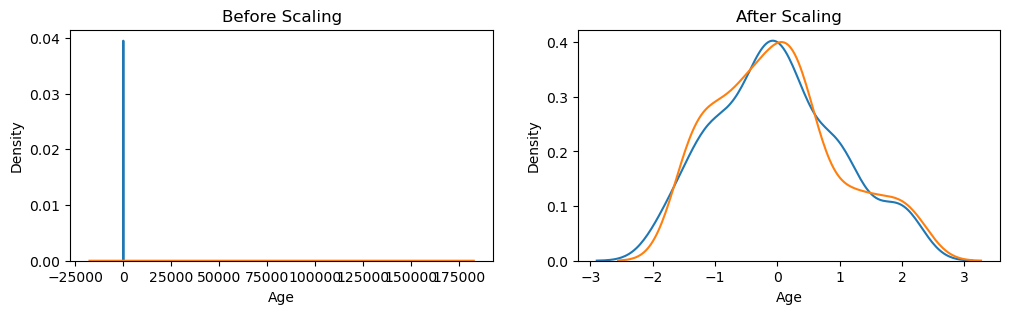

In [49]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,3))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

# Comparision of Distribution

<Axes: title={'center': 'Age Distribution after scaling'}, xlabel='Age', ylabel='Density'>

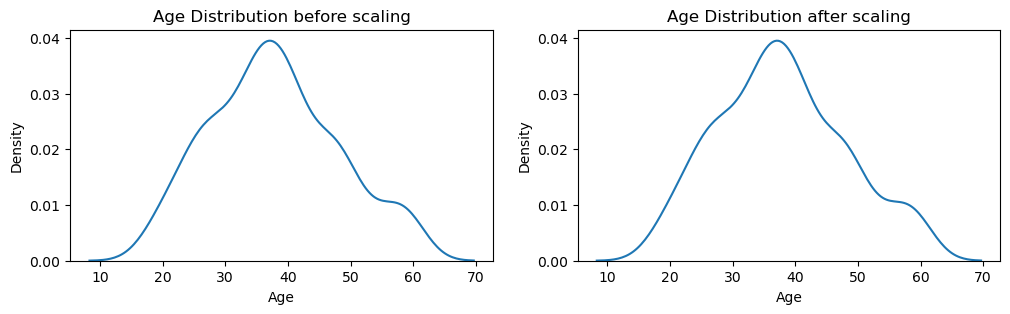

In [56]:
fig , (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,3))

ax1.set_title('Age Distribution before scaling')
sns.kdeplot(X_train['Age'], ax= ax1)

ax2.set_title('Age Distribution after scaling')
sns.kdeplot(X_train['Age'], ax=ax2)

plt.show()

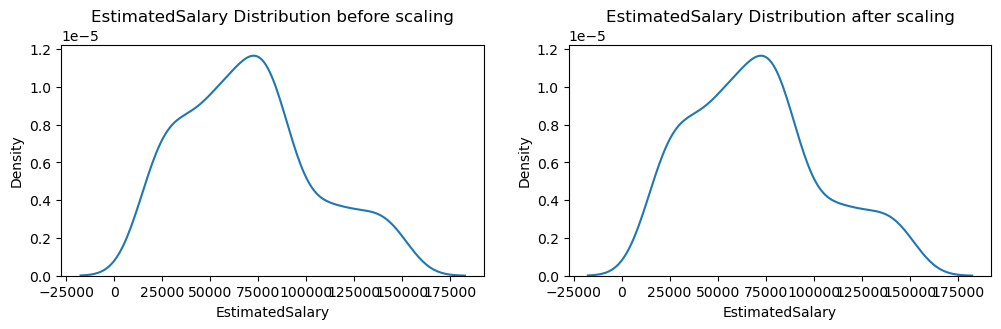

In [69]:
fig , (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,3))
ax1.set_title('EstimatedSalary Distribution before scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('EstimatedSalary Distribution after scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax2)

plt.show()

# Why it is heavily used?

In [67]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr= LogisticRegression()
lr_scaled = LogisticRegression()

In [73]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [85]:
y_pred=lr.predict(X_test)
y_pred_scaled= lr_scaled.predict(X_test_scaled)

In [87]:
from sklearn.metrics import accuracy_score


In [102]:
print('Actual:',accuracy_score(y_test, y_pred))
print('Scaled:', accuracy_score(y_test,y_pred_scaled))

Actual: 0.825
Scaled: 0.65


# KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier()
knn_scaled =KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [95]:
y_pred=knn.predict(X_test)
y_pred_scaled=knn.predict(X_test_scaled)



In [97]:
from sklearn.metrics import accuracy_score

In [99]:
print('Actual:', accuracy_score(y_test,y_pred))
print('Scaled:', accuracy_score(y_test,y_pred_scaled))

Actual: 0.825
Scaled: 0.65
